# Apoe and MD without csf in Amyloid staging dataset


In [2]:
%run /home/grg/git/alfa/nilearn-helper.py
import sys
import pandas as pd
sys.path.append('/home/grg/git/alfa/')
import multireg_spm12 as mreg
reload(mreg)
%matplotlib inline

/home/grg/jupyter/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


180201-11:23:45,538 interface WARNING:
	 Could not get linked libraries for "which".


In [4]:
excel_fp = '/home/grg/SPM/2018/amylstaging_MD_apoe.xls'

analysis_name, ext = osp.splitext(osp.split(excel_fp)[1])
paramtype = analysis_name.split('_')[1]
analysis_wd = osp.join(osp.dirname(excel_fp), analysis_name)
spm = glob(osp.join(analysis_wd, 'estimatecontrasts/SPM.mat'))
#aal_fp = '/usr/local/MATLAB/R2014a/toolbox/spm12/toolbox/aal/ROI_MNI_V5.nii'
mask_fp = '/home/grg/spm/MNI_T1_brain_wo_csf.nii'
print 'Found SPM files:', spm

Found SPM files: ['/home/grg/SPM/2018/amylstaging_MD_apoe/estimatecontrasts/SPM.mat']


In [5]:
print 'Reading', excel_fp, 'looking up column', paramtype, '...'
a = mreg.generic_version(excel_fp, analysis_wd, mask_fp, analysis_name)
n1 = a.get_node('modeldesign')
n3 = a.get_node('estimatecontrasts')
print '# of scans included in the analysis:', len(n1.inputs.in_files)
display_html(pd.DataFrame([e for e in n3.inputs.contrasts], 
             columns=['contrast name', 'contrast type', 'covariate names', 'covariate weights']))

Reading /home/grg/SPM/2018/amylstaging_MD_apoe.xls looking up column MD ...
Analysis name: amylstaging_MD_apoe
First column: images
Columns in the model: [u'age', u'gender', u'NC', u'HT', u'HO']
Non-carriers / Heterozygotes / Homozygotes detected
Effect of Gender
Effect of Linear age
Analysis name: amylstaging_MD_apoe
Scans (107): [u'/home/grg/data/AmylStaging/dartel_final/spm/MD/10019_MD_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD/10044_MD_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD/10065_MD_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD/10070_MD_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD/10137_MD_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD/10162_MD_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD/10200_MD_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD/10225_MD_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD/10235_MD_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD/10245_MD_s.nii', u'/hom

,contrast name,contrast type,covariate names,covariate weights
0,HO>HT,T,"[HO, HT]","[1.0, -1.0]"
1,HO>NC,T,"[HO, NC]","[1.0, -1.0]"
2,HT>NC,T,"[HT, NC]","[1.0, -1.0]"
3,Effect Gender,T,[gender],[1.0]
4,Effect Linear age,T,[age],[1.0]


/home/grg/SPM/2018/amylstaging_MD_apoe/estimatecontrasts/spmT_0001.nii T


/home/grg/jupyter/local/lib/python2.7/site-packages/nilearn/plotting/displays.py:656: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


Saving to... /tmp/tmp6hFP1e.png
/home/grg/SPM/2018/amylstaging_MD_apoe/estimatecontrasts/spmT_0002.nii T
Saving to... /tmp/tmpnTFqPn.png
/home/grg/SPM/2018/amylstaging_MD_apoe/estimatecontrasts/spmT_0003.nii T
Saving to... /tmp/tmpwSFZrH.png
/home/grg/SPM/2018/amylstaging_MD_apoe/estimatecontrasts/spmT_0004.nii T
Saving to... /tmp/tmpdptICE.png
/home/grg/SPM/2018/amylstaging_MD_apoe/estimatecontrasts/spmT_0005.nii T
Saving to... /tmp/tmp3QGb70.png


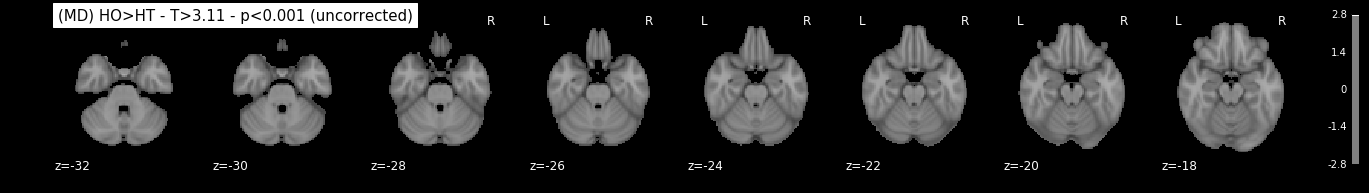

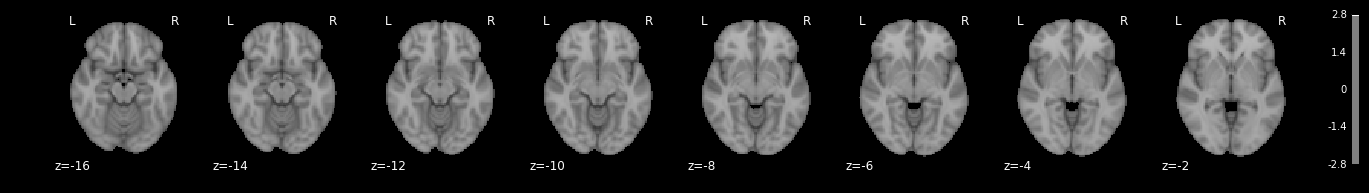

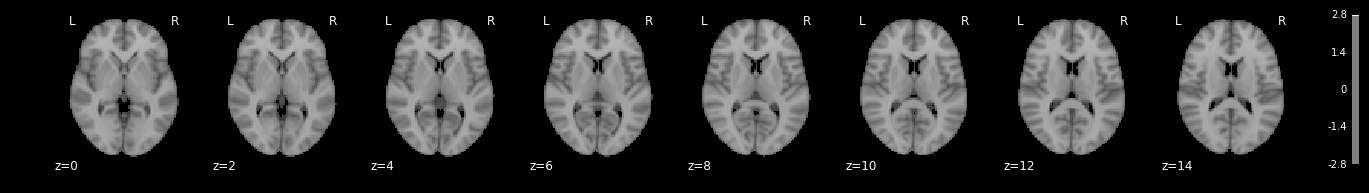

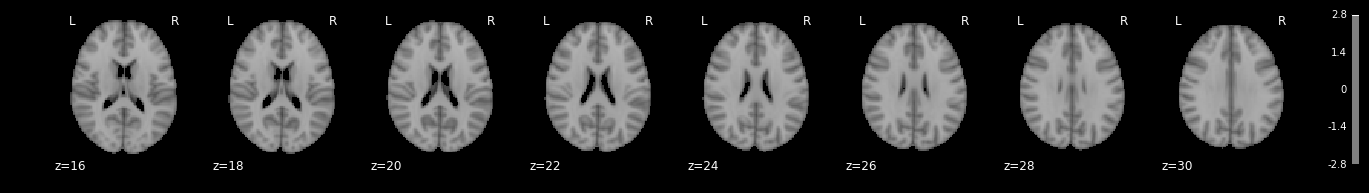

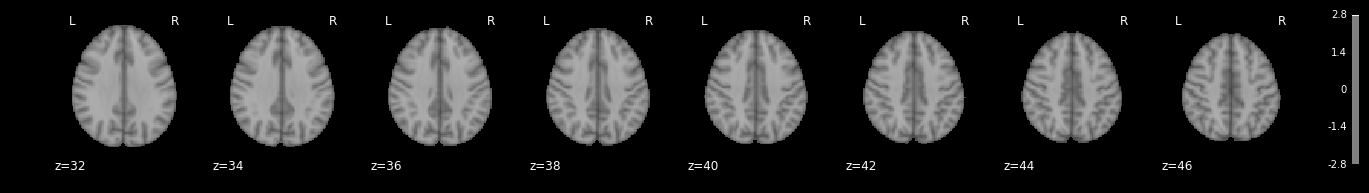

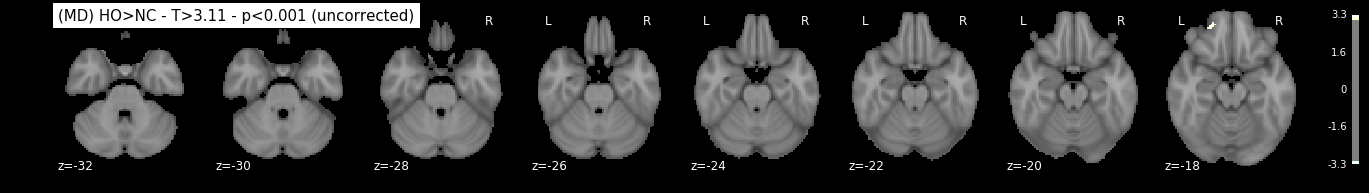

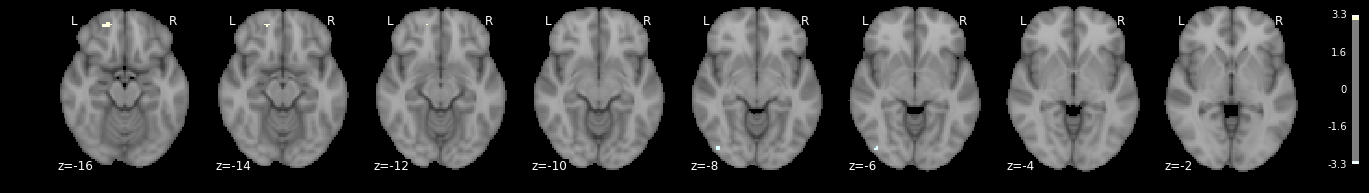

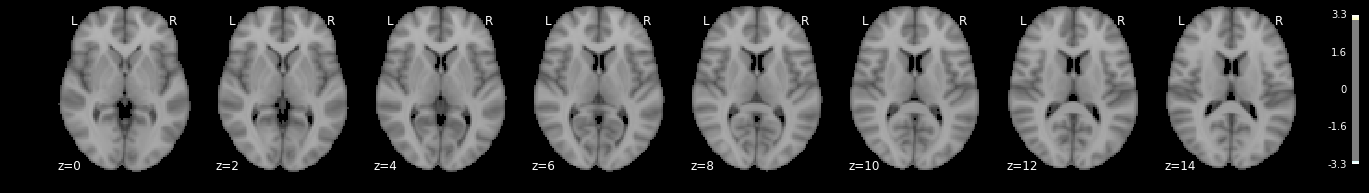

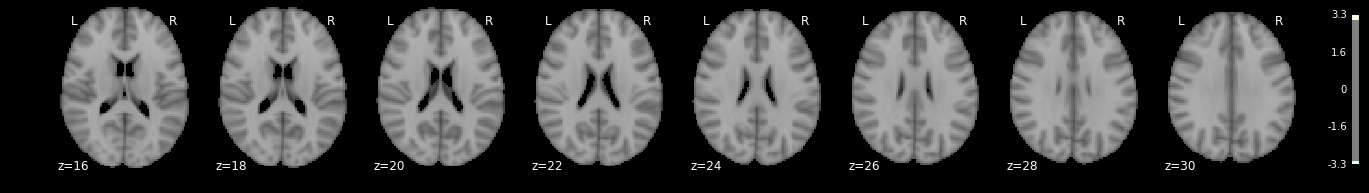

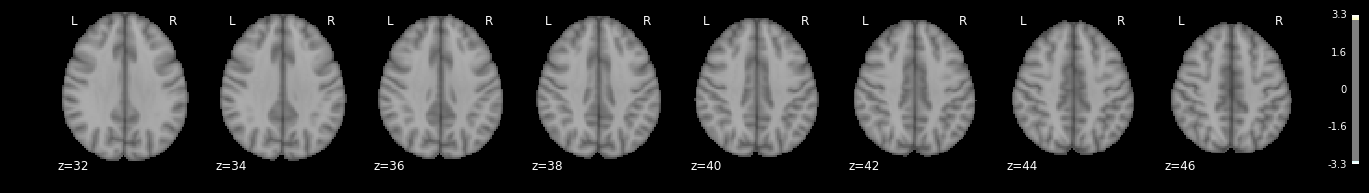

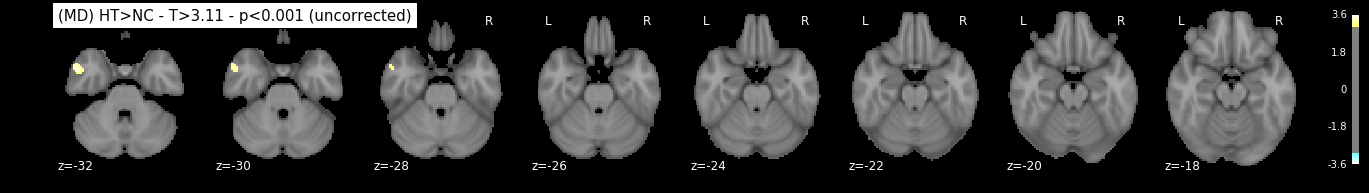

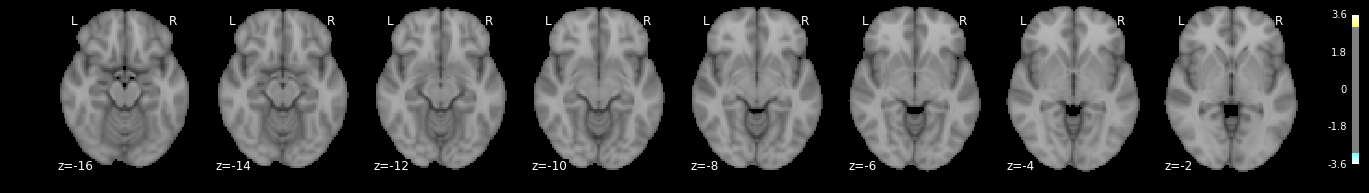

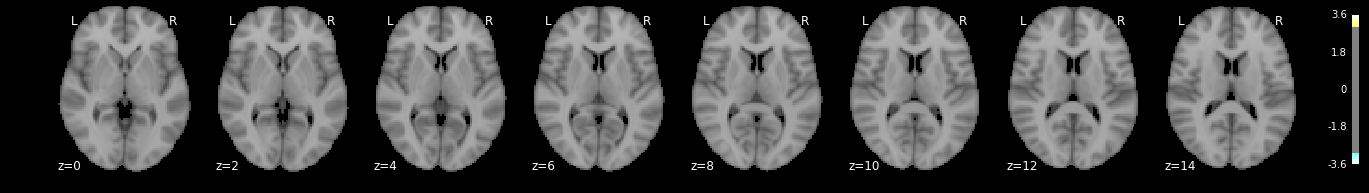

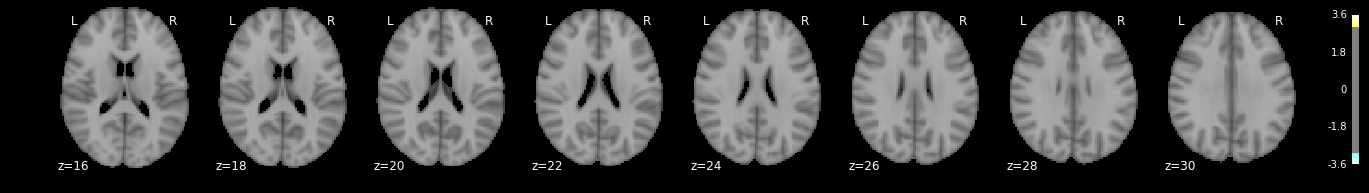

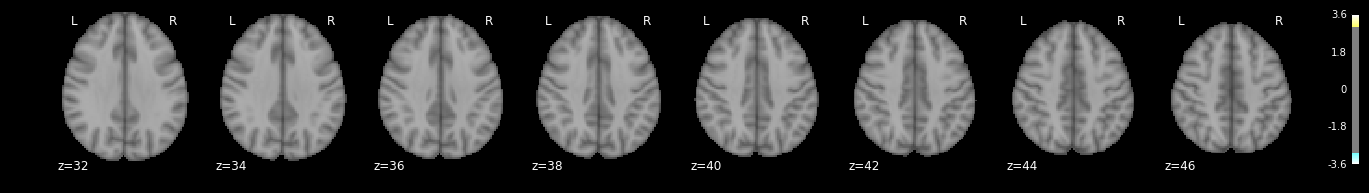

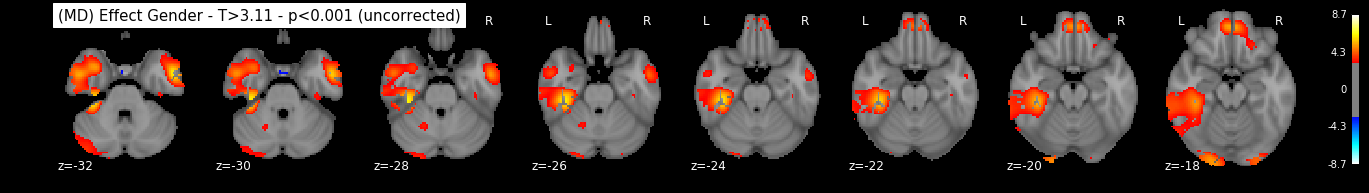

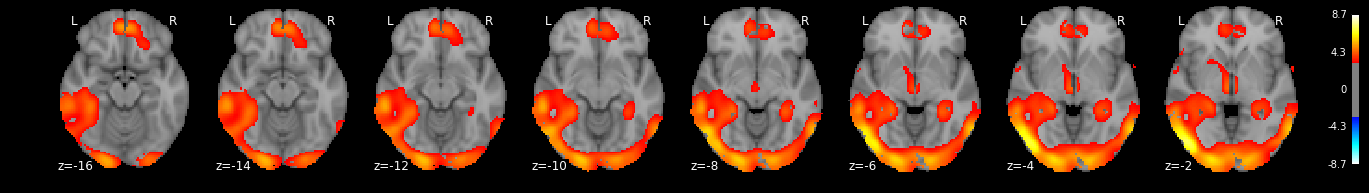

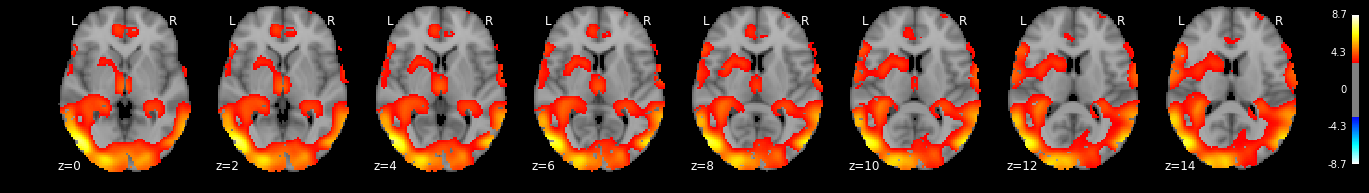

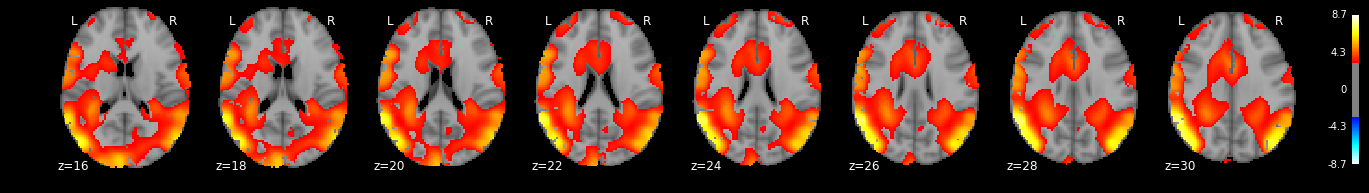

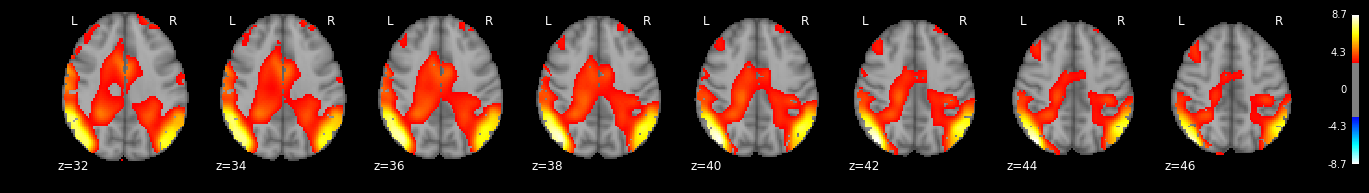

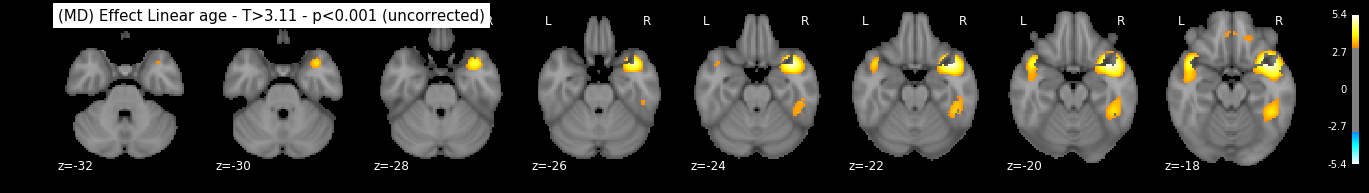

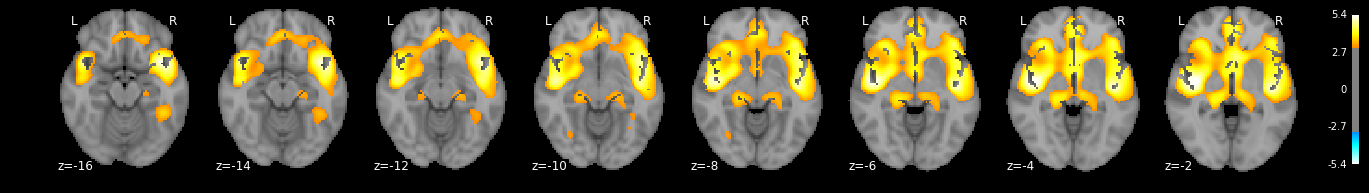

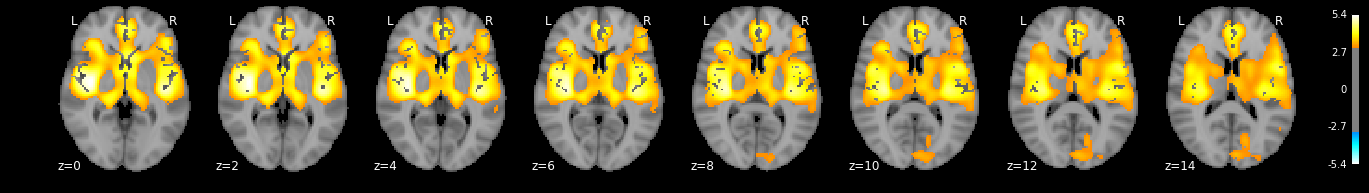

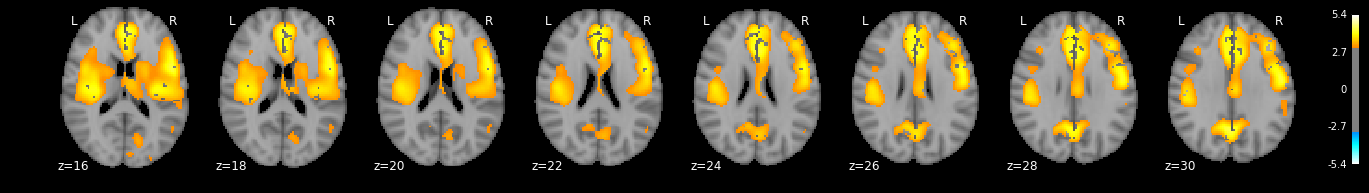

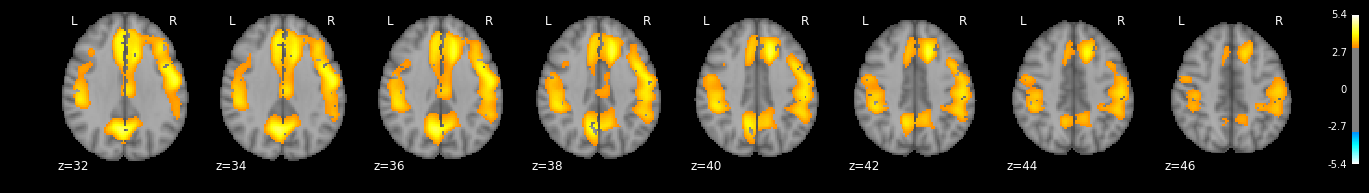

In [6]:
sections = sections_allcontrasts(analysis_wd, paramtype, axis='z', mode='uncorrected')

In [10]:
spm_mat_file = '/tmp/analysis_amylstaging/ALFA_data_staging/estimatecontrasts/SPM.mat'
out = pyAAL.pyAAL(spm_mat_file, 2, k=10, mode=2)
pyAAL.to_dataframe(out)

AssertionError: 